In [9]:
#Objective: Predict which customers are likely to accept a personal loan using a classification model and gain business insights from the data.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [11]:
df = pd.read_csv(r'C:\Users\hp\Downloads\bank+marketing\bank\bank-full.csv', sep=';') 
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15 

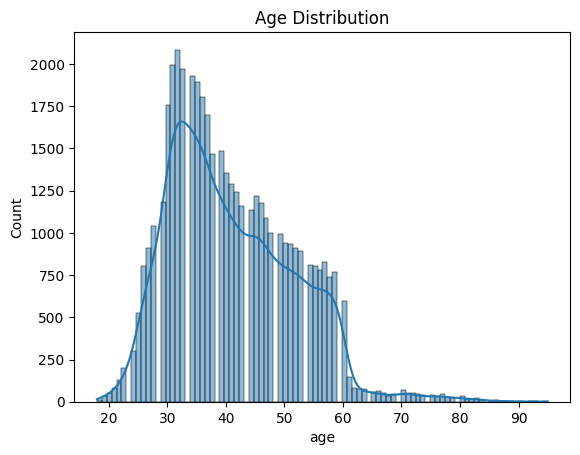

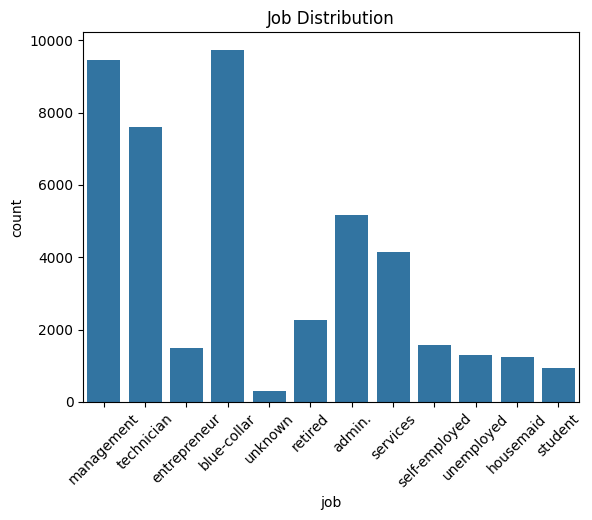

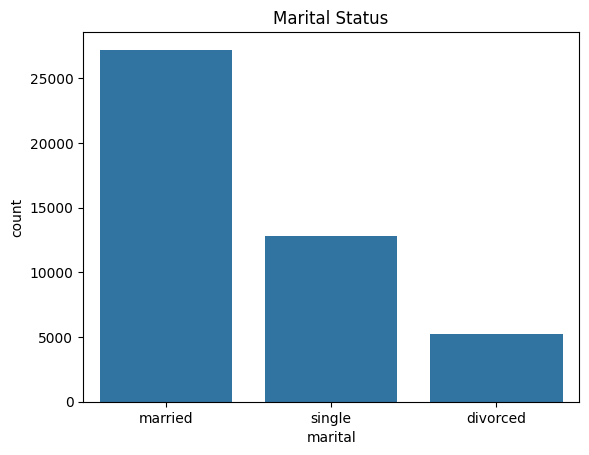

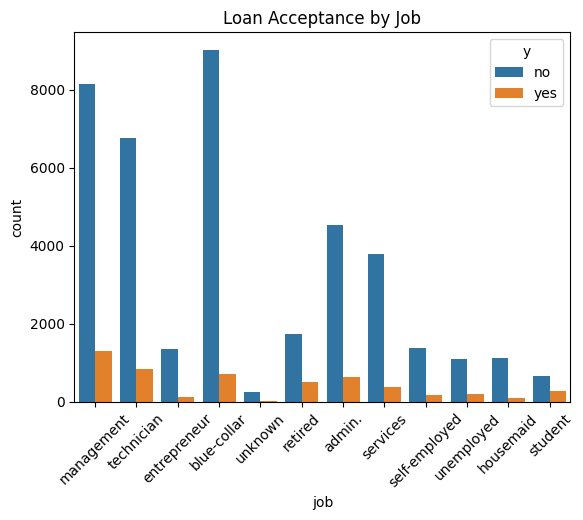

In [13]:
#Data Exploration
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.show()

sns.countplot(x='marital', data=df)
plt.title('Marital Status')
plt.show()

sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Loan Acceptance by Job')
plt.show()


In [14]:
#Encode Categorical Variables
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = le.fit_transform(df_encoded[col])

#Define Features and Target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#Model Training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Logistic Regression Results
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
[[7781  171]
 [ 869  222]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.20      0.30      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.88      0.86      9043

Accuracy: 0.8849939179475838


In [17]:
#Conclusion
#Both Logistic Regression and Decision Tree models provide decent prediction performance.
#Decision Tree offers interpretability through feature importance.
#Marketing strategies can be focused on specific age groups, job types, and previous responders to increase success rate of loan offers.